Loading dataset...
Creating histogram plots...
✅ Histogram plots saved to variable_histograms.png


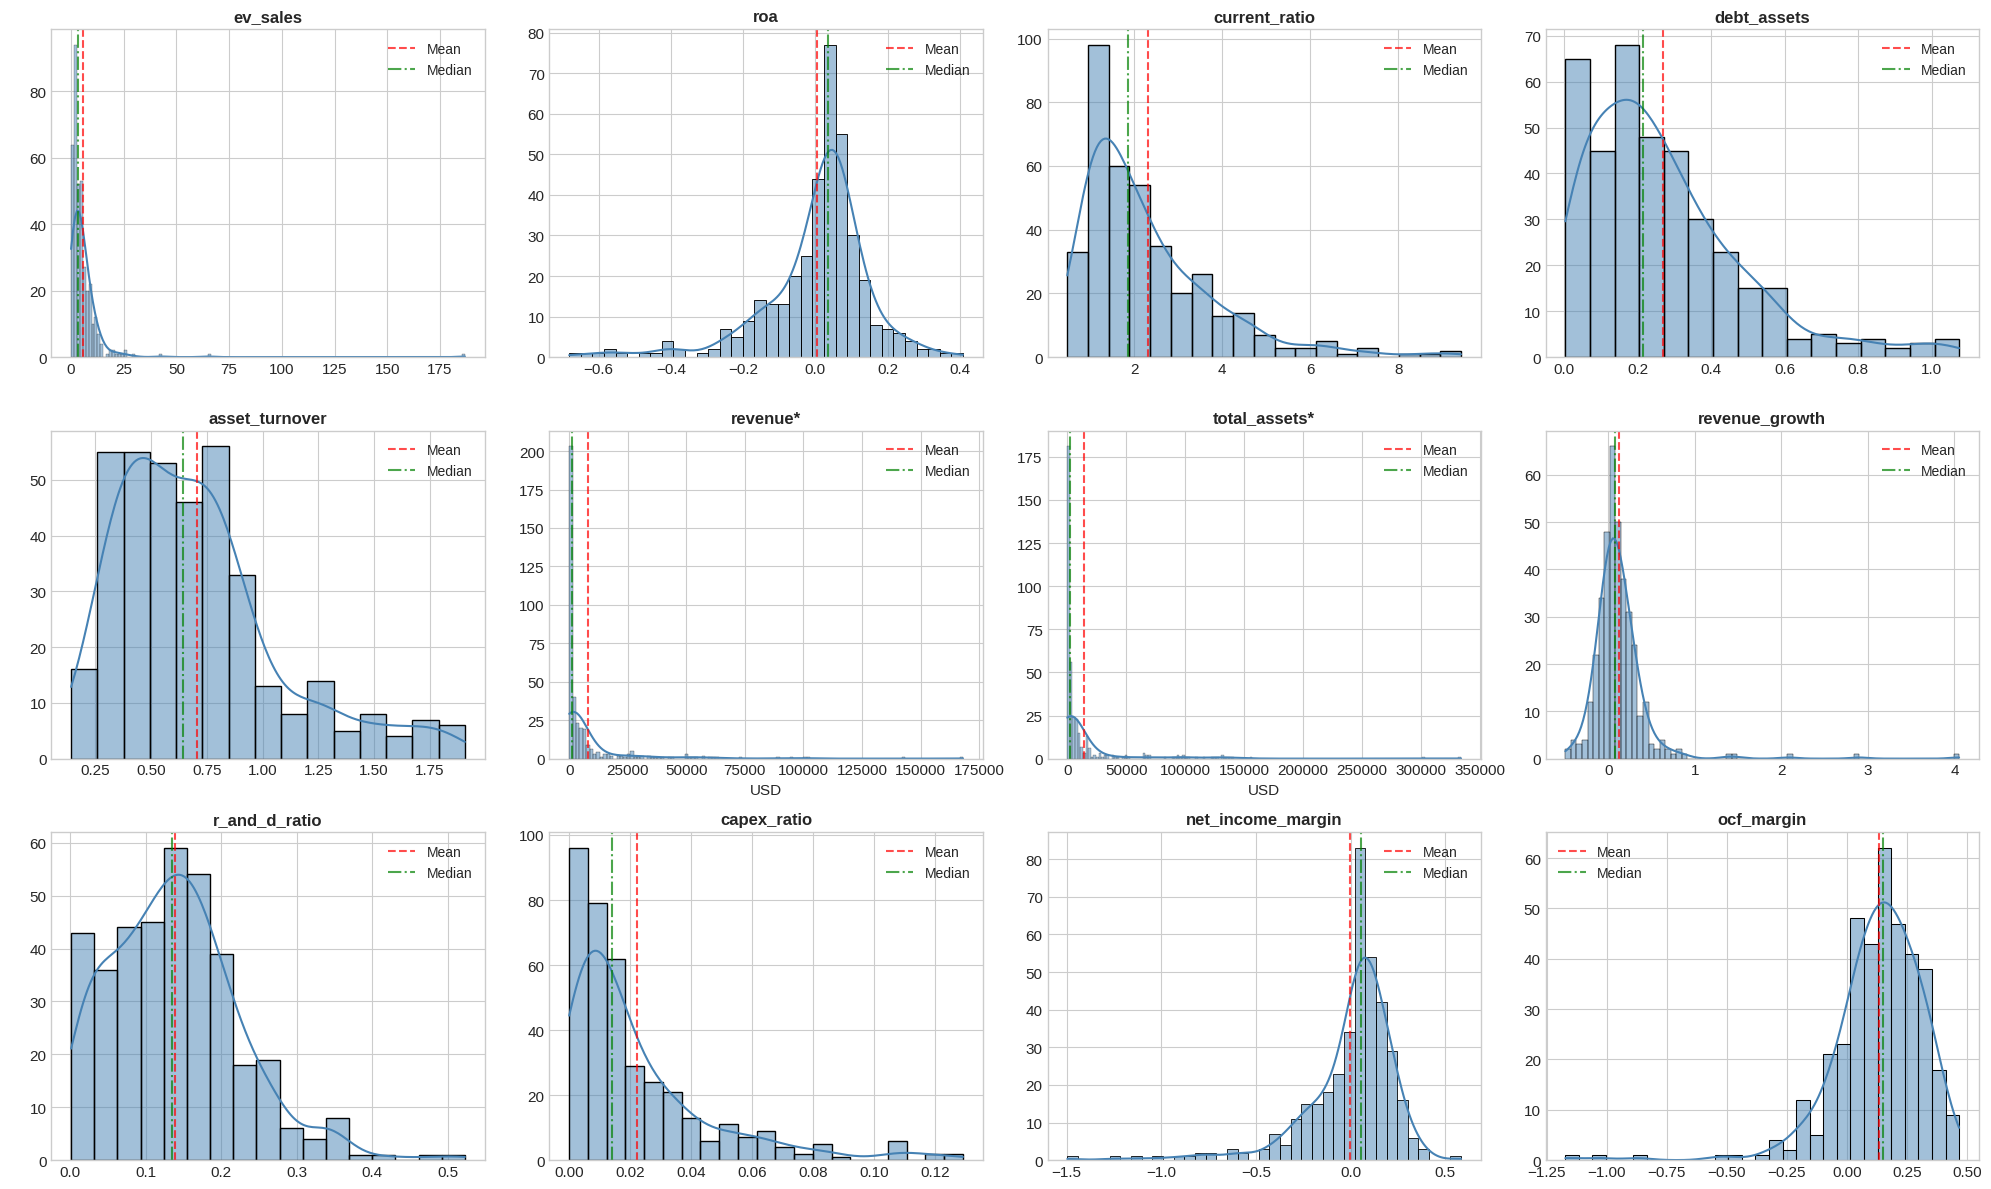

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------------------------
# LOAD DATA FROM CSV
# -------------------------------------------------------------------
print("Loading dataset...")
df = pd.read_csv("cleaned_dataset.csv")

# -------------------------------------------------------------------
# SCALE SELECTED VARIABLES FOR PLOTTING PURPOSES
# -------------------------------------------------------------------
scale_vars = ['revenue', 'total_assets']
df_scaled = df.copy()
for var in scale_vars:
    if var in df_scaled.columns:
        df_scaled[var] = df_scaled[var] / 1_000_000

# -------------------------------------------------------------------
# IDENTIFY NUMERIC COLUMNS
# -------------------------------------------------------------------
numeric_vars = df_scaled.select_dtypes(include=[np.number]).columns.tolist()
numeric_vars = [col for col in numeric_vars if col.lower() != 'year']

# -------------------------------------------------------------------
# CREATE HISTOGRAM PLOTS
# -------------------------------------------------------------------
print("Creating histogram plots...")

plt.style.use('seaborn-v0_8-whitegrid')
n_cols = 4
n_rows = int(np.ceil(len(numeric_vars) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    ax = axes[i]
    data = df_scaled[var].dropna()
    sns.histplot(data, kde=True, ax=ax, color='steelblue')

    mean_val = data.mean()
    median_val = data.median()
    ax.axvline(mean_val, color='red', linestyle='--', alpha=0.7, label='Mean')
    ax.axvline(median_val, color='green', linestyle='-.', alpha=0.7, label='Median')

    label = f"{var}*" if var in scale_vars else var
    ax.set_title(label, fontsize=12, fontweight='bold')

    if var in scale_vars:
        ax.set_xlabel("USD", fontsize=11)
    else:
        ax.set_xlabel("", fontsize=11)

    ax.set_ylabel(" ")
    ax.legend(fontsize=10)
    ax.tick_params(axis='both', labelsize=11)
    ax.ticklabel_format(style='plain', axis='x')

for j in range(len(numeric_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# -------------------------------------------------------------------
# SAVE OUTPUT TO FILE
# -------------------------------------------------------------------
output_filename = "variable_histograms.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f"✅ Histogram plots saved to {output_filename}")

plt.show()


In [ ]:
import pandas as pd
import numpy as np

# -------------------------------------------------------------------
# LOAD DATASET
# -------------------------------------------------------------------
df = pd.read_csv("cleaned_dataset.csv")

# -------------------------------------------------------------------
# LOG TRANSFORM SELECTED VARIABLES
# -------------------------------------------------------------------
log_vars = ['ev_sales', 'revenue', 'total_assets']
for var in log_vars:
    if var in df.columns:
        df[f'log_{var}'] = np.log(df[var] + 1)
df = df.drop(columns=['revenue', 'total_assets'], errors='ignore')

# -------------------------------------------------------------------
# CREATE LIFECYCLE STAGE DUMMIES
# -------------------------------------------------------------------
if 'lifecycle_stage' in df.columns:
    df['lifecycle_stage'] = df['lifecycle_stage'].astype(str)
    lifecycle_dummies = pd.get_dummies(df['lifecycle_stage'], prefix='lifecycle_stage', dtype=int)
    df = pd.concat([df, lifecycle_dummies], axis=1)

# -------------------------------------------------------------------
# SAVE UPDATED DATASET
# -------------------------------------------------------------------
df.to_csv("processed_dataset.csv", index=False)
print("✅ Saved as 'processed_dataset.csv'")

✅ Saved as 'processed_dataset.csv'


📥 Loading dataset...
✅ 13 numeric columns selected for correlation matrix:
ev_sales, roa, current_ratio, debt_assets, asset_turnover, revenue_growth, r_and_d_ratio, capex_ratio, net_income_margin, ocf_margin, log_ev_sales, log_revenue, log_total_assets
📊 Using 379 rows with complete data for correlation analysis.
✅ Correlation matrix saved to: correlation_matrix.csv


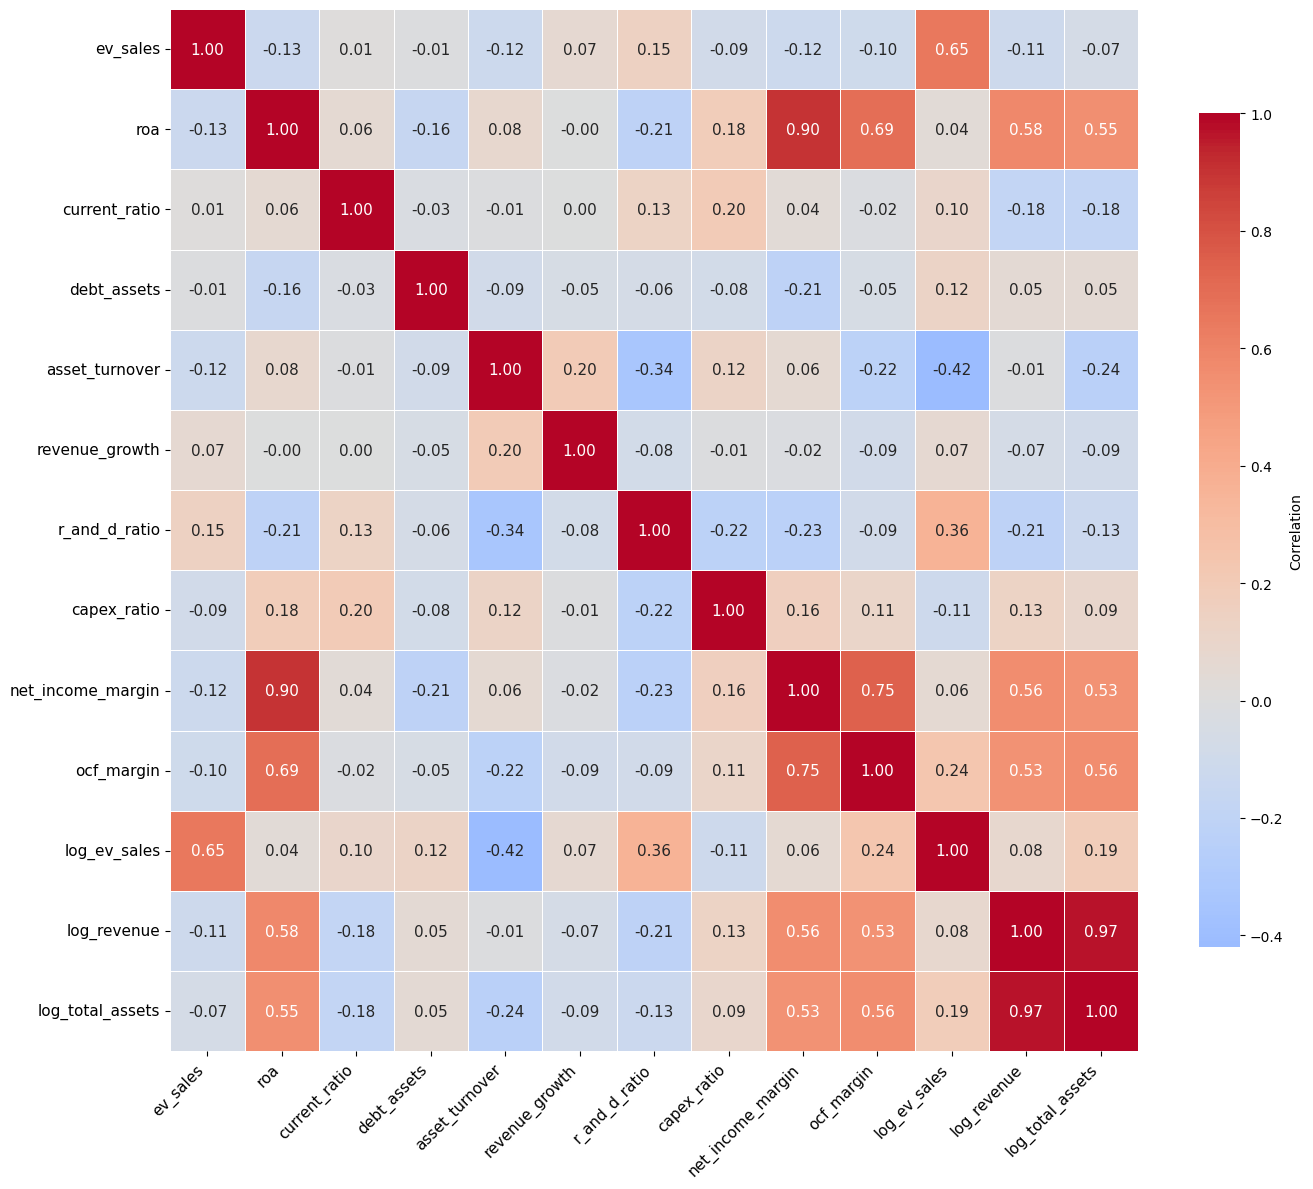

✅ Heatmap saved as correlation_matrix_heatmap.png
📈 Correlation analysis complete!


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------------------------
# PATH CONFIGURATION
# ------------------------------------------------------------------------------
INPUT_PATH = "processed_dataset.csv"
CORR_MATRIX_FILENAME = "correlation_matrix.csv"
HEATMAP_FILENAME = "correlation_matrix_heatmap.png"

# ------------------------------------------------------------------------------
# LOAD DATA
# ------------------------------------------------------------------------------
print("📥 Loading dataset...")
df = pd.read_csv(INPUT_PATH)
df = df.drop(columns=[
    'ticker', 'year',
    'lifecycle_stage_Early', 'lifecycle_stage_Maturity', 'lifecycle_stage_Decline'
], errors='ignore')

# ------------------------------------------------------------------------------
# SELECT NUMERIC COLUMNS
# ------------------------------------------------------------------------------
numeric_cols = df.select_dtypes(include='number').columns.tolist()

print(f"✅ {len(numeric_cols)} numeric columns selected for correlation matrix:")
print(", ".join(numeric_cols))

# ------------------------------------------------------------------------------
# DROP MISSING VALUES
# ------------------------------------------------------------------------------
df_corr = df[numeric_cols].dropna()
print(f"📊 Using {len(df_corr)} rows with complete data for correlation analysis.")

# ------------------------------------------------------------------------------
# CORRELATION MATRIX
# ------------------------------------------------------------------------------
corr_matrix = df_corr.corr().round(2)

corr_matrix.to_csv(CORR_MATRIX_FILENAME)
print(f"✅ Correlation matrix saved to: {CORR_MATRIX_FILENAME}")

# ------------------------------------------------------------------------------
# HEATMAP VISUALIZATION
# ------------------------------------------------------------------------------
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 11},
    cbar_kws={"label": "Correlation", "shrink": 0.8}
)

plt.xticks(rotation=45, ha="right", fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()

plt.savefig(HEATMAP_FILENAME, dpi=300)
plt.show()
print(f"✅ Heatmap saved as {HEATMAP_FILENAME}")
print("📈 Correlation analysis complete!")


In [ ]:
import pandas as pd

# ------------------------------------------------------------------------------
# PATH CONFIGURATION
# ------------------------------------------------------------------------------
INPUT_PATH = "processed_dataset.csv"
OUTPUT_PATH = "regression_dataset.csv"  # Overwriting the same file

# ------------------------------------------------------------------------------
# VARIABLES TO DROP
# ------------------------------------------------------------------------------
drop_vars = ['net_income_margin', 'log_revenue']

# ------------------------------------------------------------------------------
# LOAD AND PROCESS DATASET
# ------------------------------------------------------------------------------
print("Loading dataset...")
df = pd.read_csv(INPUT_PATH)
print(f"Original shape: {df.shape}")

existing_vars = [var for var in drop_vars if var in df.columns]
df = df.drop(columns=existing_vars)
print(f"Dropped columns: {', '.join(existing_vars)}")
print(f"New shape: {df.shape}")

# ------------------------------------------------------------------------------
# SAVE UPDATED DATASET
# ------------------------------------------------------------------------------
df.to_csv(OUTPUT_PATH, index=False)
print(f"✅ Cleaned dataset saved as '{OUTPUT_PATH}'")


Loading dataset...
Original shape: (379, 19)
Dropped columns: net_income_margin, log_revenue
New shape: (379, 17)
✅ Cleaned dataset saved as 'regression_dataset.csv'


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# -------------------------------------------------------------------
# LOAD DATA
# -------------------------------------------------------------------
print("Loading dataset...")
df = pd.read_csv("regression_dataset.csv")

# -------------------------------------------------------------------
# PREPARE VARIABLES
# -------------------------------------------------------------------
X = df.drop(columns=[
    'ticker', 'year',
    'ev_sales', 'log_ev_sales',
    'lifecycle_stage_Early', 'lifecycle_stage_Maturity', 'lifecycle_stage_Decline'
], errors='ignore')

X = X.select_dtypes(include=[np.number])
X = sm.add_constant(X)

# -------------------------------------------------------------------
# CALCULATE VIFs
# -------------------------------------------------------------------
print("\nCalculating Variance Inflation Factors (VIF)...")

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data[vif_data["Variable"] != "const"]

# -------------------------------------------------------------------
# OUTPUT RESULTS
# -------------------------------------------------------------------
print("\nVariance Inflation Factors (VIF):")
print(vif_data.round(2))

vif_data.to_csv("vif_results.csv", index=False)
print("\n✅ VIF results saved to vif_results.csv")

Loading dataset...

Calculating Variance Inflation Factors (VIF)...

Variance Inflation Factors (VIF):
           Variable   VIF
1               roa  2.64
2     current_ratio  1.17
3       debt_assets  1.08
4    asset_turnover  1.47
5    revenue_growth  1.05
6     r_and_d_ratio  1.28
7       capex_ratio  1.15
8        ocf_margin  2.37
9  log_total_assets  1.87

✅ VIF results saved to vif_results.csv


In [ ]:
import pandas as pd
import numpy as np


# ------------------------------------------------------------------------------
# CONFIGURATION
# ------------------------------------------------------------------------------
INPUT_PATH = "regression_dataset.csv"
OUTPUT_PATH = "descriptive_statistics.csv"


# ------------------------------------------------------------------------------
# LOAD DATA
# ------------------------------------------------------------------------------
print("📥 Loading dataset...")
df = pd.read_csv(INPUT_PATH)
print(f"Dataset shape: {df.shape}")
print(f"Unique companies: {df['ticker'].nunique()}")
print(f"Years: {df['year'].min()} to {df['year'].max()}")


# ------------------------------------------------------------------------------
# SELECT NUMERIC VARIABLES
# ------------------------------------------------------------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col.lower() != 'year']
print(f"\n✅ Using {len(numeric_cols)} numeric variables:\n{', '.join(numeric_cols)}")


# ------------------------------------------------------------------------------
# DESCRIPTIVE STATISTICS
# ------------------------------------------------------------------------------
print("\n📊 Generating descriptive statistics...")


desc_stats = pd.DataFrame(index=numeric_cols, columns=['N', 'Mean', 'St. Dev.', 'Min', 'Max'])


for col in numeric_cols:
    desc_stats.loc[col, 'N'] = df[col].count()
    desc_stats.loc[col, 'Mean'] = df[col].mean()
    desc_stats.loc[col, 'St. Dev.'] = df[col].std()
    desc_stats.loc[col, 'Min'] = df[col].min()
    desc_stats.loc[col, 'Max'] = df[col].max()


for stat_col in ['Mean', 'St. Dev.', 'Min', 'Max']:
    desc_stats[stat_col] = desc_stats[stat_col].apply(lambda x: '{:.2f}'.format(float(x)))


desc_stats = desc_stats.reset_index().rename(columns={'index': 'Variable'})
desc_stats.to_csv(OUTPUT_PATH, index=False)

# -------------------------------------------------------------------
# PRINT AND SAVE OUTPUT
# -------------------------------------------------------------------
print(f"\n✅ Descriptive statistics saved to: {OUTPUT_PATH}")
print("\n📌 Preview of statistics:")
print(desc_stats.head())

📥 Loading dataset...
Dataset shape: (379, 17)
Unique companies: 126
Years: 2020 to 2024

✅ Using 14 numeric variables:
ev_sales, roa, current_ratio, debt_assets, asset_turnover, revenue_growth, r_and_d_ratio, capex_ratio, ocf_margin, log_ev_sales, log_total_assets, lifecycle_stage_Decline, lifecycle_stage_Early, lifecycle_stage_Maturity

📊 Generating descriptive statistics...

✅ Descriptive statistics saved to: descriptive_statistics.csv

📌 Preview of statistics:
         Variable    N  Mean St. Dev.    Min     Max
0        ev_sales  379  5.60    10.99   0.01  186.85
1             roa  379  0.00     0.15  -0.68    0.41
2   current_ratio  379  2.30     1.51   0.47    9.43
3     debt_assets  379  0.27     0.21   0.00    1.07
4  asset_turnover  379  0.70     0.37   0.14    1.91


In [ ]:
import pandas as pd
import numpy as np


# ------------------------------------------------------------------------------
# CONFIGURATION
# ------------------------------------------------------------------------------
INPUT_PATH = "regression_dataset.csv"
OUTPUT_PATH = "lifecycle_stage_comparison.csv"


# ------------------------------------------------------------------------------
# LOAD DATA
# ------------------------------------------------------------------------------
print("📥 Loading dataset...")
df = pd.read_csv(INPUT_PATH)
print(f"Dataset shape: {df.shape}")


# ------------------------------------------------------------------------------
# SET LIFECYCLE STAGE FROM DUMMIES
# ------------------------------------------------------------------------------
print("🔄 Creating lifecycle stage column...")


df['lifecycle_stage'] = 'Unknown'
df.loc[df.get('lifecycle_stage_Early') == 1, 'lifecycle_stage'] = 'Early'
df.loc[df.get('lifecycle_stage_Maturity') == 1, 'lifecycle_stage'] = 'Maturity'
df.loc[df.get('lifecycle_stage_Decline') == 1, 'lifecycle_stage'] = 'Decline'


# ------------------------------------------------------------------------------
# SELECT NUMERIC COLUMNS
# ------------------------------------------------------------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
excluded = ['year', 'lifecycle_stage_Early', 'lifecycle_stage_Maturity', 'lifecycle_stage_Decline']
numeric_cols = [col for col in numeric_cols if col not in excluded]


# ------------------------------------------------------------------------------
# DESCRIPTIVE STATISTICS BY LIFECYCLE
# ------------------------------------------------------------------------------
print(f"📊 Calculating means by lifecycle stage for {len(numeric_cols)} variables...")


result_df = pd.DataFrame(index=numeric_cols)


for stage in ['Early', 'Maturity', 'Decline']:
    stage_data = df[df['lifecycle_stage'] == stage]
    if len(stage_data) > 0:
        result_df[stage] = stage_data[numeric_cols].mean()
    else:
        result_df[stage] = np.nan

result_df = result_df.applymap(lambda x: '{:.2f}'.format(float(x)) if pd.notnull(x) else 'N/A')
result_df = result_df.reset_index().rename(columns={'index': 'Variable'})


# -------------------------------------------------------------------
# PRINT AND SAVE OUTPUT
# -------------------------------------------------------------------
result_df.to_csv(OUTPUT_PATH, index=False)
print(f"\n✅ Lifecycle stage comparison saved to: {OUTPUT_PATH}")


print("\n📌 Preview:")
print(result_df.head())


print("\nAnalysis complete!")

📥 Loading dataset...
Dataset shape: (379, 17)
🔄 Creating lifecycle stage column...
📊 Calculating means by lifecycle stage for 11 variables...

✅ Lifecycle stage comparison saved to: lifecycle_stage_comparison.csv

📌 Preview:
         Variable  Early Maturity Decline
0        ev_sales   7.44     5.12    4.11
1             roa  -0.06     0.04   -0.02
2   current_ratio   2.47     2.18    2.42
3     debt_assets   0.25     0.27    0.29
4  asset_turnover   0.78     0.69    0.62

Analysis complete!


<ipython-input-2-0600b3264202>:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result_df = result_df.applymap(lambda x: '{:.2f}'.format(float(x)) if pd.notnull(x) else 'N/A')


Loading dataset...
Preparing yearly mean and CI data...
Creating yearly evolution plots...
✅ Evolution plots saved to variable_yearly_evolution.png


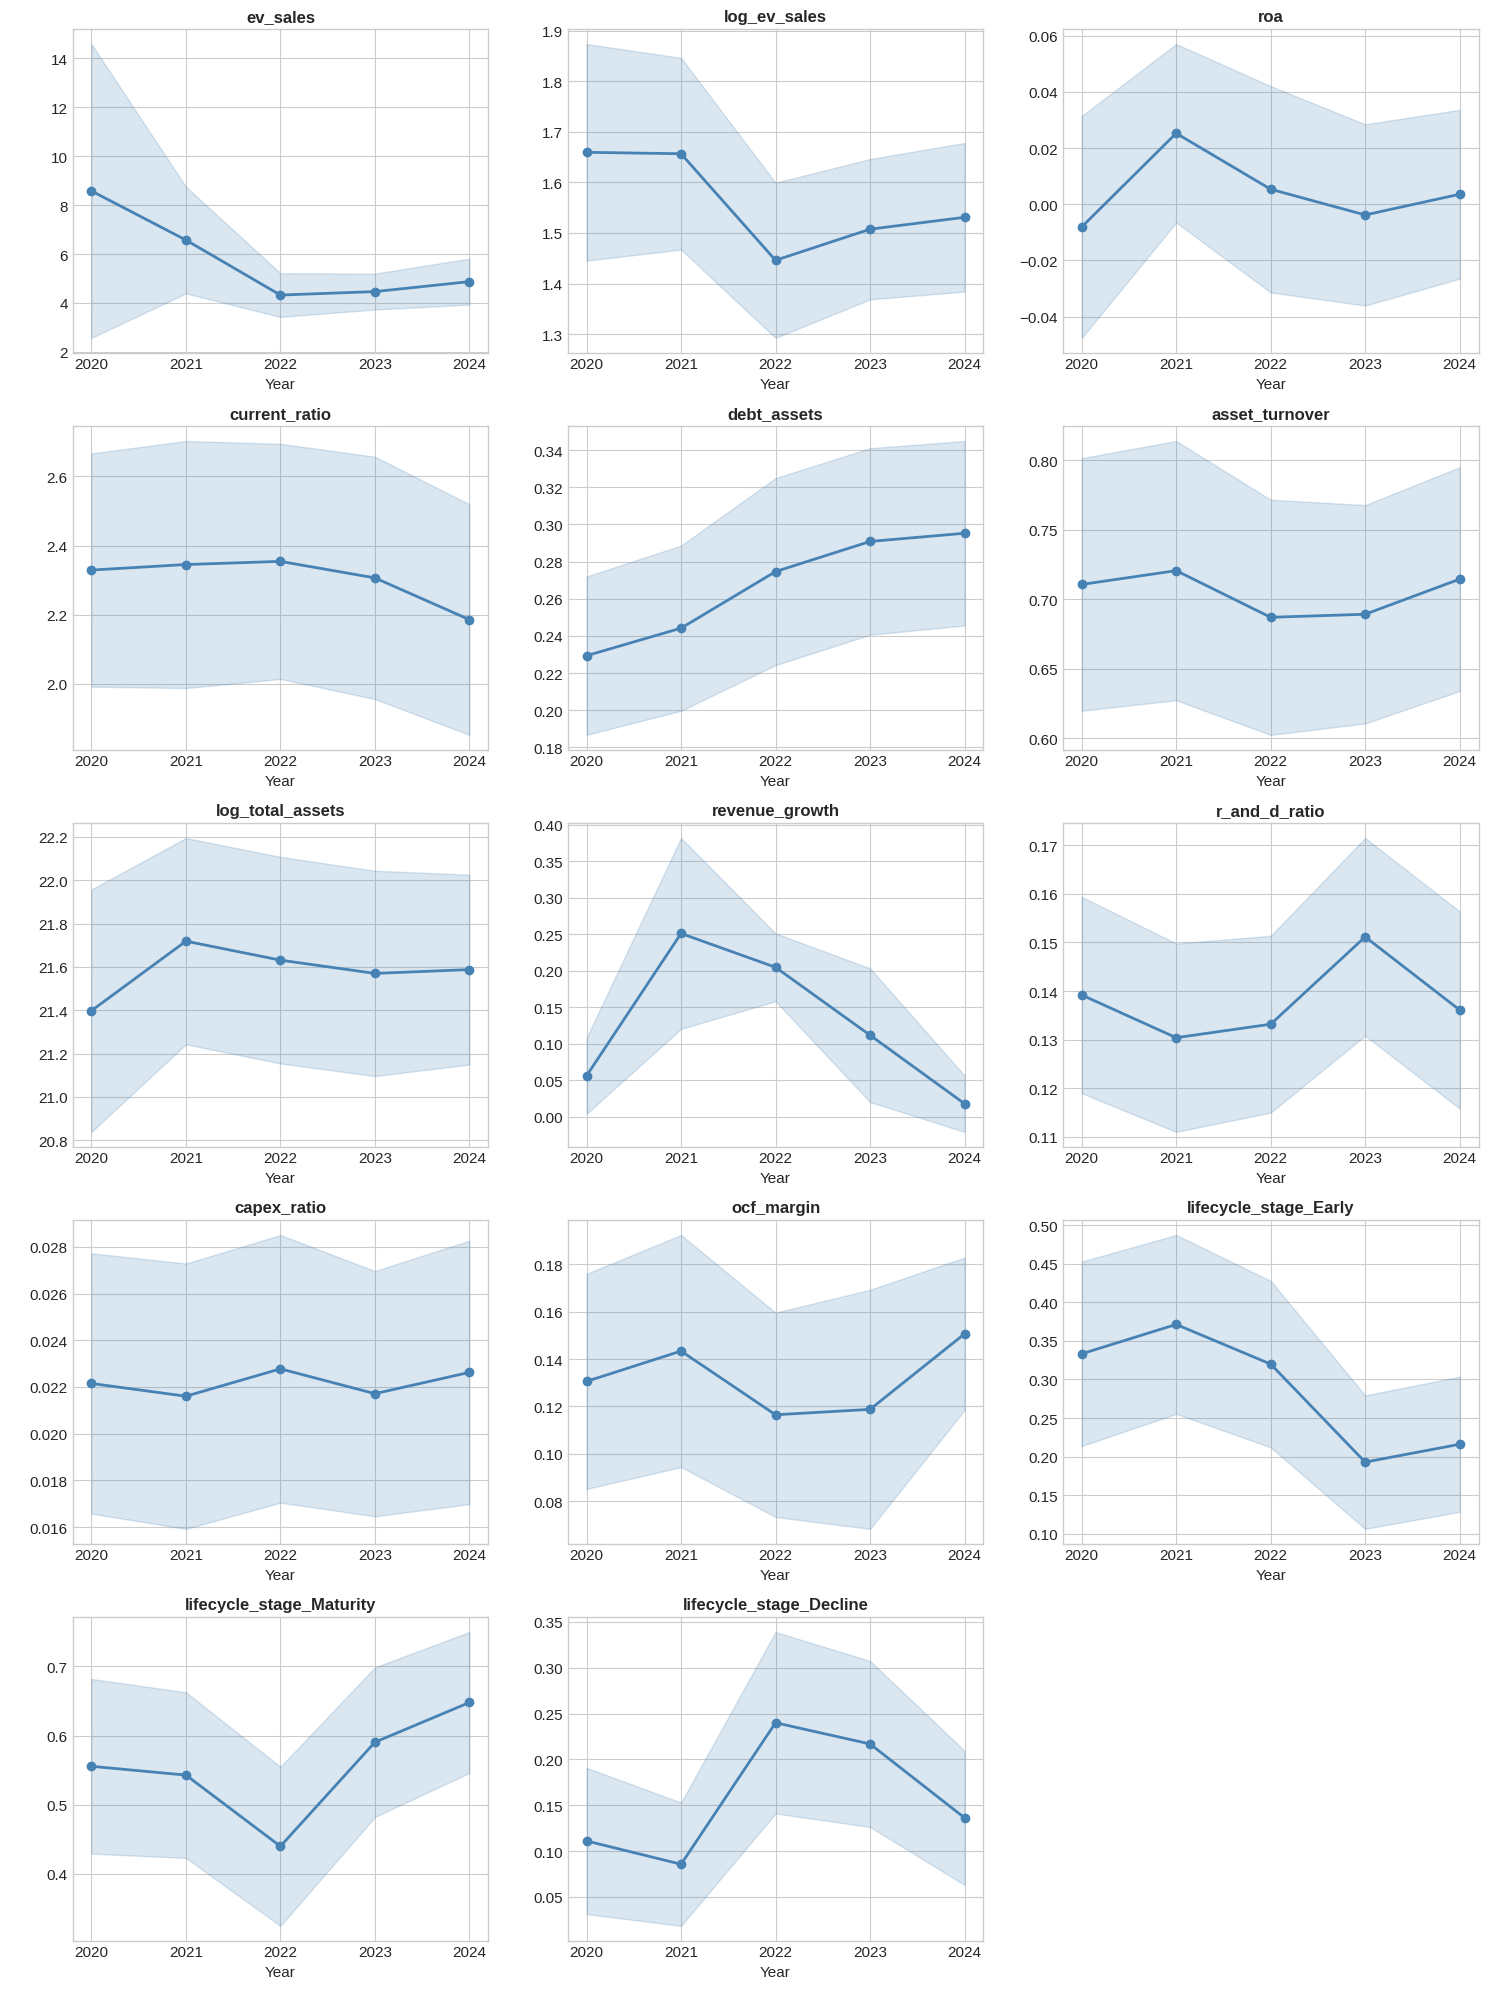

Plotting complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# -------------------------------------------------------------------
# LOAD DATA FROM CSV
# -------------------------------------------------------------------
print("Loading dataset...")
df = pd.read_csv("regression_dataset.csv")

# -------------------------------------------------------------------
# SET DESIRED ORDER OF VARIABLES
# -------------------------------------------------------------------
ordered_vars = [
    'ev_sales', 'log_ev_sales', 'roa', 'current_ratio', 'debt_assets',
    'asset_turnover', 'log_total_assets', 'revenue_growth', 'r_and_d_ratio',
    'capex_ratio', 'ocf_margin', 'lifecycle_stage_Early',
    'lifecycle_stage_Maturity', 'lifecycle_stage_Decline'
]

# -------------------------------------------------------------------
# FILTER ONLY THOSE COLUMNS THAT EXIST
# -------------------------------------------------------------------
numeric_vars = [var for var in ordered_vars if var in df.columns]

# -------------------------------------------------------------------
# AGGREGATE DATA FOR EVOLUTION PLOTS
# -------------------------------------------------------------------
def calculate_ci(series):
    return stats.sem(series, nan_policy='omit') * stats.t.ppf(0.975, len(series.dropna()) - 1)

print("Preparing yearly mean and CI data...")
yearly_stats = {}
for var in numeric_vars:
    grouped = df.groupby('year')[var]
    yearly_means = grouped.mean()
    yearly_cis = grouped.apply(calculate_ci)
    yearly_stats[var] = {'mean': yearly_means, 'ci': yearly_cis}

# -------------------------------------------------------------------
# CREATE EVOLUTION PLOTS
# -------------------------------------------------------------------
print("Creating yearly evolution plots...")

plt.style.use('seaborn-v0_8-whitegrid')
n_cols = 3
n_rows = int(np.ceil(len(numeric_vars) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    ax = axes[i]
    years = yearly_stats[var]['mean'].index
    means = yearly_stats[var]['mean'].values
    cis = yearly_stats[var]['ci'].values

    ax.plot(years, means, marker='o', color='steelblue', linewidth=2)
    ax.fill_between(years, means - cis, means + cis, color='steelblue', alpha=0.2)

    ax.set_title(var, fontsize=12, fontweight='bold')
    ax.set_xlabel("Year", fontsize=11)
    ax.set_ylabel(" ")
    ax.tick_params(axis='both', labelsize=11)
    ax.set_xticks(years)
    ax.set_xticklabels(years, fontsize=11)

for j in range(len(numeric_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# -------------------------------------------------------------------
# PRINT AND SAVE OUTPUT
# -------------------------------------------------------------------
output_filename = "variable_yearly_evolution.png"
plt.savefig(output_filename, dpi=300, bbox_inches='tight')
print(f"✅ Evolution plots saved to {output_filename}")

plt.show()
print("Plotting complete!")